# [통계학 개인 분석 보고서] 프로젝트
## 프로젝트 주제 : IMDB 영화 리뷰 감정 분석
이 프로젝트의 목표는 **캐글 IMDB 영화 리뷰 데이터**를 바탕으로 **긍정(positive)과 부정(negative) 리뷰를 분류하는 머신러닝 모델**을 구축하고 성능을 비교하는 것입니다. 또한,  모델의 가중치를 활용하여 데이터셋에서 **리뷰 감정 분석에 영향을 미치는 상위 10개 단어**를 파악하고, **중심 극한 정리 실험**을 통해 데이터의 통계적 특성을 확인합니다.



## 1. 데이터 다운로드 및 로드

Kaggle에서 IMDB 영화 리뷰 데이터셋을 다운로드하여, 리뷰 텍스트(input x)와 긍정/부정 감정 라벨(output y)을 준비합니다.

**Kaggle IMDB 영화 리뷰 데이터셋:**

1. 데이터셋 규모(50K)가 충분히 크고, 학습/테스트에 용이
2. 리뷰 레이블이 명확한 이진 분류 문제로 초보자도 접근하기 좋음.
3. 실제 사용자 리뷰 기반이라 ‘현실적인 감정 분석'에 가까움.

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# 머신러닝 관련
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# 성능 평가 지표
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 경고 무시 (불필요한 warning 제거)
import warnings
warnings.filterwarnings('ignore')

# Kaggle 데이터 다운로드
!pip install kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# 압축 해제
with zipfile.ZipFile("imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
    zip_ref.extractall("imdb_data")

# 데이터 로드
data = pd.read_csv("imdb_data/IMDB Dataset.csv")
print(data.head())

# 클래스 분포 확인
print(data['sentiment'].value_counts())

Traceback (most recent call last):


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 78, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/__init__.py", line 114, in create_command
    module = importlib.import_module(module_path)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1050, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1006, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 688, in _load_unlocked
  File "<frozen importlib._boots

## 2. 데이터 전처리 및 텍스트 수치화

sentiment 열을 0과 1로 라벨 인코딩하고,  
TF-IDF 방식으로 텍스트 데이터를 벡터화합니다.

In [49]:
# 라벨 인코딩
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# 데이터 분할
X = data['review']
y = data['sentiment']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 텍스트 벡터화 (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## 3. 머신러닝 모델링
리뷰 텍스트를 바탕으로 Logistic Regression, Random Forest, Naive Bayes 모델을 학습합니다.

### Logistic Regression


In [50]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)
logreg_acc = accuracy_score(y_test, y_pred_logreg)

### Random Forest

In [51]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
rf_acc = accuracy_score(y_test, y_pred_rf)

### Naive Bayes

In [52]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
nb_acc = accuracy_score(y_test, y_pred_nb)

## 4. 모델 성능 비교

### Accuracy

In [53]:
# 모델 성능 비교
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [logreg_acc, rf_acc, nb_acc]
})

print(results)

                 Model  Accuracy
0  Logistic Regression    0.8971
1        Random Forest    0.8527
2          Naive Bayes    0.8581


### Classfication Report

In [54]:
# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5000
           1       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5000
           1       0.86      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      5000
           1       0.86      0.86      0.86      5000

    accuracy                           0.86     10000
   macro avg 

## 5. 주요 변수(특징) 분석
Logistic Regression 모델의 가중치를 활용하여 리뷰 감정에 영향을 미치는 단어를 파악하고, 이를 워드 클라우드로 시각화합니다.

### Top 10 positive / negative words

In [55]:
# Logistic Regression Feature Importance
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = logreg.coef_[0]

# 긍정적인 단어와 부정적인 단어 추출
top_positive_indices = coefficients.argsort()[-100:][::-1]  # 가장 긍정적인 단어
top_negative_indices = coefficients.argsort()[:100]  # 가장 부정적인 단어

print("Top positive words:", [feature_names[i] for i in top_positive_indices[:10]])
print("Top negative words:", [feature_names[i] for i in top_negative_indices[:10]])

Top positive words: ['great', 'excellent', 'best', 'perfect', 'amazing', 'wonderful', 'loved', 'enjoyed', 'hilarious', 'favorite']
Top negative words: ['worst', 'waste', 'awful', 'bad', 'boring', 'poor', 'terrible', 'worse', 'poorly', 'horrible']


### Top 10 positive / negative words with coefficients

In [57]:
print("Top Positive Words:")
for idx in top_positive_indices[:10]:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

print("\nTop Negative Words:")
for idx in top_negative_indices[:10]:
    print(f"{feature_names[idx]}: {coefficients[idx]}")

Top Positive Words:
great: 7.627547463510589
excellent: 7.08854608603523
best: 5.565919309806148
perfect: 5.380751362251058
amazing: 5.179049654375042
wonderful: 5.052883641416363
loved: 4.836596199006497
enjoyed: 4.494664824087777
hilarious: 4.430432898336427
favorite: 4.416147078723172

Top Negative Words:
worst: -10.367097539611715
waste: -8.355213019963264
awful: -8.1001501304357
bad: -7.883139845673155
boring: -6.607941570598092
poor: -6.06046375918054
terrible: -5.824554149534289
worse: -5.296655649011469
poorly: -5.1806261780516705
horrible: -5.171456798836318


**부정적**인 영향을 주는 단어는 계수가 **음수 방향**으로 크다. 리뷰에 해당 단어가 많이 등장하면 모델이 리뷰를 부정적으로 판단할 가능성이 높다는 뜻이다.
**긍정적**인 영향을 주는 단어는 계수가 **양수 방향**으로 크다.
이런 방식으로 **단어 중요도를 해석**하고, 실제 단어가 의미하는 바(영화와 관련된 부정적 표현, 긍정적 표현)를 확인함으로써 **모델이 어떤 근거로 분류하는지 파악**할 수 있다.

## Top 100 positive / negative words Word Cloud

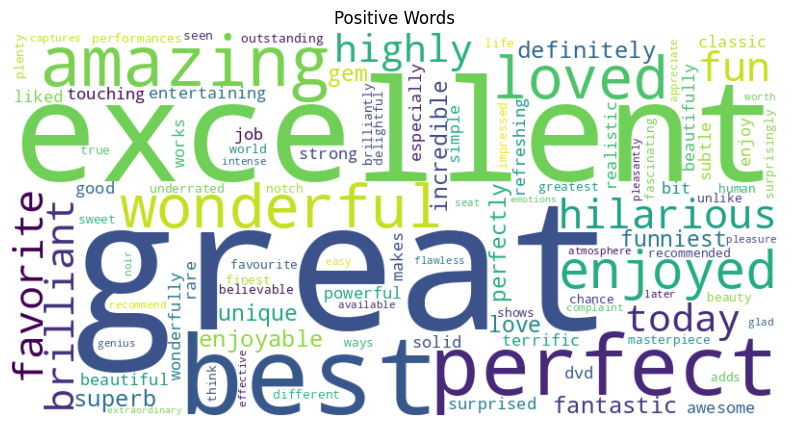

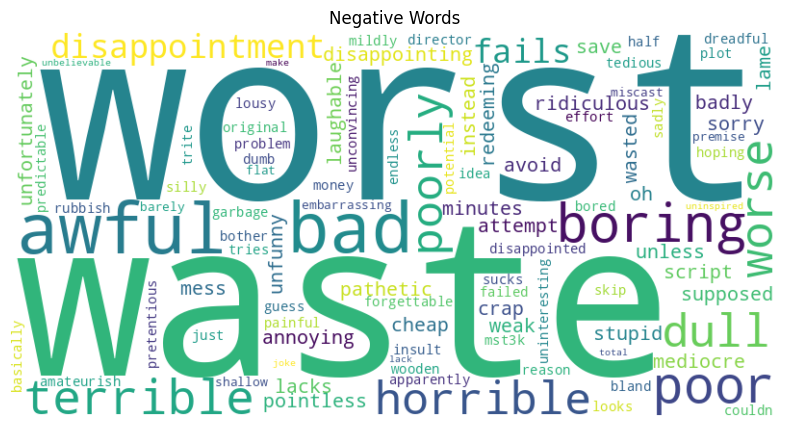

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 긍정 단어 워드클라우드
positive_words = {feature_names[i]: coefficients[i] for i in top_positive_indices}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_words)
plt.figure(figsize=(10, 5))
plt.title("Positive Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 부정 단어 워드클라우드
negative_words = {feature_names[i]: -coefficients[i] for i in top_negative_indices}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_words)
plt.figure(figsize=(10, 5))
plt.title("Negative Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 6. 중심 극한 정리 실험


리뷰 길이, 부정어의 수, 감탄사 개수에 대한 중심 극한 정리를 실험, 개념을 확인합니다.  
데이터셋 (50000개의 리뷰) 에서 표본 크기 (5, 10, 50, 100)에 따라 무작위로 샘플을 추출하여 **표본 평균의 분포 변화**를 시각화합니다.  

표본 크기가 **커질수록**, **표본 평균의 분포가 정규분포에 가까워짐**을 확인할 수 있었습니다.  
표본 크기가 5일 때는 표본평균의 분산이 크고 분포 모양이 그리 정규분포같지 않았으나,  
**표본 크기가 100** 일 때는 분포가 상당히 **정규분포에 가깝게 근사함**을 확인할 수 있다.

In [59]:
# 중심 극한 정리 실험 함수 (재사용 가능)
def clt_experiment(data, sample_sizes=[5, 10, 50, 100], n_iterations=1000, title_suffix=""):
    """
    중심 극한 정리 실험 함수
    - data: 데이터 컬럼
    - sample_sizes: 샘플 크기의 리스트
    - n_iterations: 반복 횟수
    - title_suffix: 그래프 타이틀의 동적 텍스트
    """
    plt.figure(figsize=(12, 8))
    for size in sample_sizes:
        sample_means = [np.mean(np.random.choice(data, size, replace=True)) for _ in range(n_iterations)]
        plt.hist(sample_means, bins=30, alpha=0.5, label=f'Sample Size {size}')
    plt.title(f'Central Limit Theorem Demonstration: {title_suffix}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

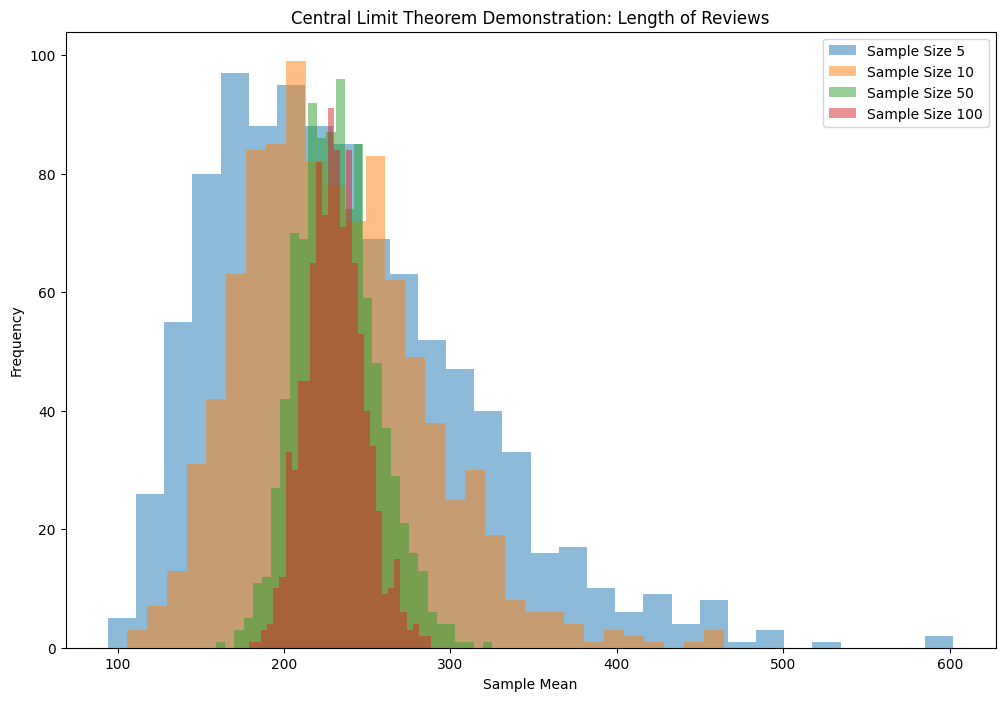

In [60]:
# 리뷰 길이에 대한 CLT 실험
data['review_length'] = data['review'].apply(lambda x: len(x.split()))
clt_experiment(data['review_length'], sample_sizes=[5, 10, 50, 100], title_suffix="Length of Reviews")

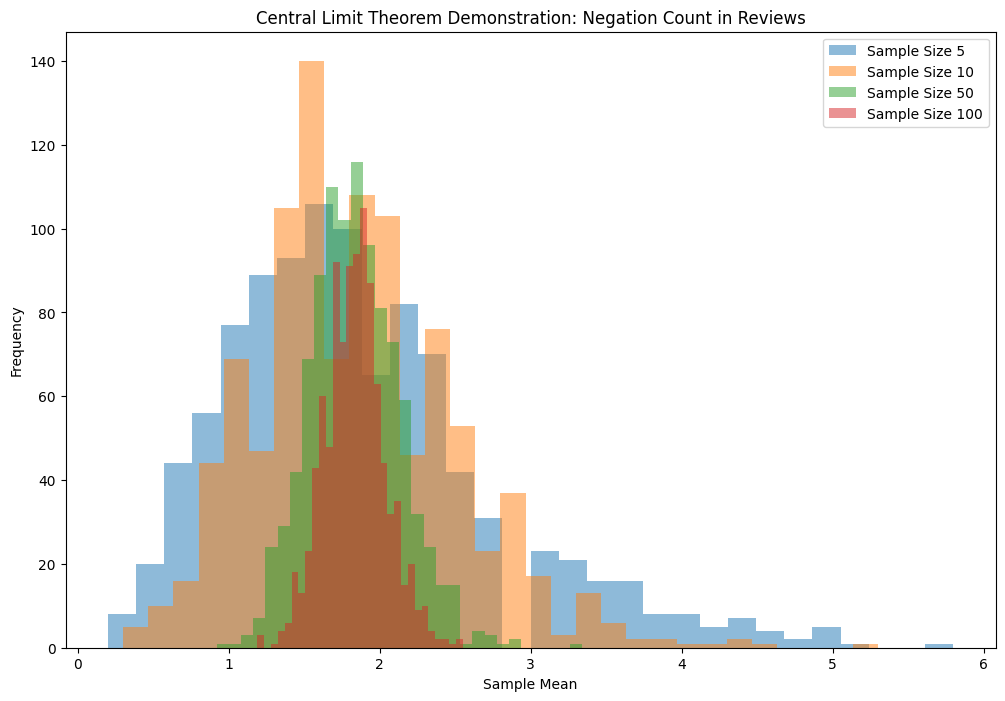

In [61]:
negations = ['not', 'no', 'never']
data['negation_count'] = data['review'].apply(lambda x: sum([1 for word in x.split() if word.lower() in negations]))
clt_experiment(data['negation_count'], sample_sizes=[5, 10, 50, 100], title_suffix="Negation Count in Reviews")

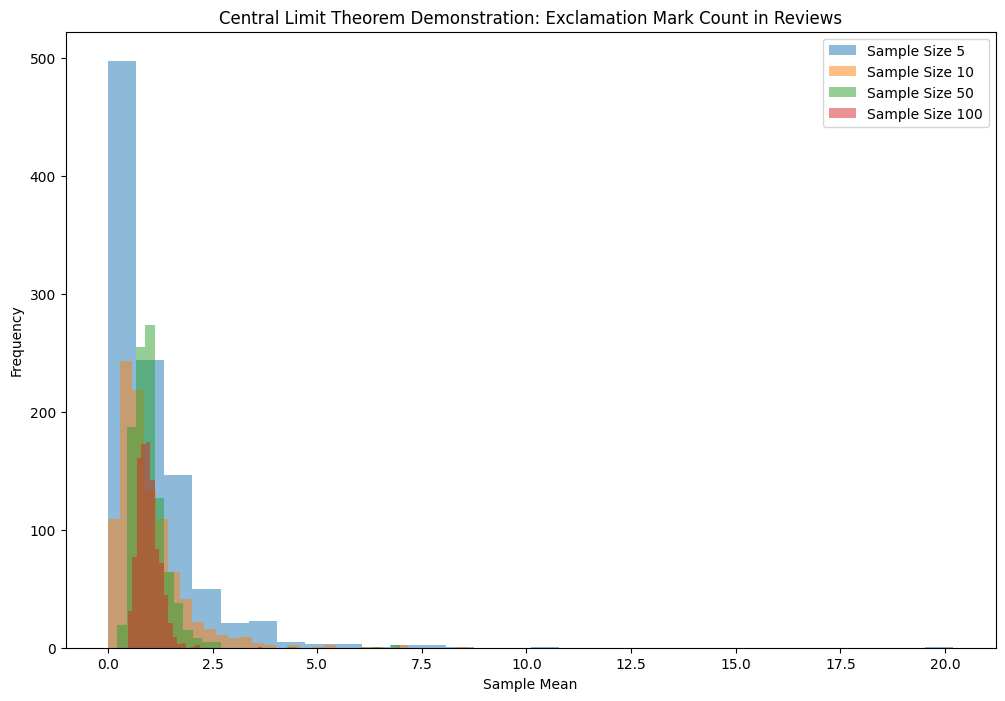

In [62]:
data['exclamation_count'] = data['review'].apply(lambda x: x.count('!'))
clt_experiment(data['exclamation_count'], sample_sizes=[5, 10, 50, 100], title_suffix="Exclamation Mark Count in Reviews")